In [1]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

In [2]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])    

In [9]:
def plot_data(X, y, ax, pos_label='y=1', neg_label='y=0', loc='best'):
    pos = y == 1
    neg = y == 0
    pos = pos.reshape(-1,)  #work with 1D or 1D y vectors
    neg = neg.reshape(-1,)
    ax.scatter(X[pos, 0], X[pos, 1], marker='x', color='red', label=pos_label)
    ax.scatter(X[neg, 0], X[neg, 1], marker='o', fc='none', ec='blue', lw=2, label=neg_label)
    ax.figure.canvas.toolbar_visible = False
    ax.figure.canvas.header_visible = False
    ax.figure.canvas.footer_visible = False
    ax.legend(loc=loc)


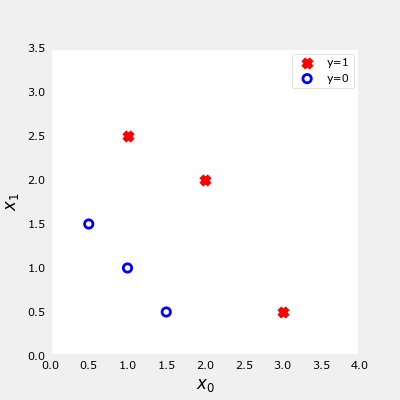

In [11]:
fig, ax = plt.subplots(1,1, figsize=(4,4))
plot_data(X_train, y_train, ax)
# Set both axes to be from 0-4
ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.show()

In [12]:
def log_1pexp(z):
    z = np.asarray(z, dtype=np.float64)
    out = np.where(
        z >= 0,
        z + np.log1p(np.exp(-z)),
        np.log1p(np.exp(z))
    )
    return out

In [13]:
def compute_cost_logistic(X, y, w, b):
    m = X.shape[0]
    z = np.dot(X, w) + b
    cost = -(y * z) + log_1pexp(z)
    return np.squeeze(np.sum(cost)/m)

In [14]:
w_tmp = np.array([1,1])
b_tmp = -3
print(compute_cost_logistic(X_train, y_train, w_tmp, b_tmp))

0.3668667864055175


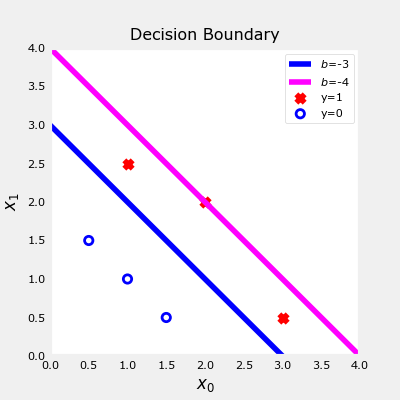

In [17]:
x0 = np.arange(0, 6)
x1 = 3 - x0
x1_other = 4 -x0

fig, ax = plt.subplots(1,1, figsize=(4,4))
ax.plot(x0, x1, color='blue', label='$b$=-3')
ax.plot(x0, x1_other, color='magenta', label='$b$=-4')
ax.axis([0, 4, 0, 4])
plot_data(X_train, y_train, ax)
ax.axis([0, 4, 0, 4])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.legend(loc="upper right")
plt.title("Decision Boundary")
plt.show()

In [19]:
w_array1 = np.array([1,1])
b_1 = -3
w_array2 = np.array([1,1])
b_2 = -4

print("Cost for b = -3 : ", compute_cost_logistic(X_train, y_train, w_array1, b_1))
print("Cost for b = -4 : ", compute_cost_logistic(X_train, y_train, w_array2, b_2))

Cost for b = -3 :  0.3668667864055175
Cost for b = -4 :  0.503680863674846
